In [1]:
from transformers import BertTokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.models import load_model
import numpy as np
import tensorflow as tf
import pandas as pd
from transformers import TFBertModel

In [2]:
class PersonalityPredictor:  
    
    def prepare(self, posts, cols):
        colnames = ['sentence']
        colnames = colnames+cols
        data = pd.DataFrame(columns = colnames)
        data.loc[0, 'sentence'] = posts
        return data
    
    def loadModel(self):
        model = tf.keras.models.load_model("personalityPredictor.h5", custom_objects={'TFBertModel':TFBertModel})
        return model
    
    def predict(self, model, inputPosts):
        prediction = model.predict(np.array(inputPosts))
        return prediction
        
        
    def tokenizing(self, posts, maxLen = 150):
        allTokens = []
        tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)
        for post in posts:
            token = tokenizer.encode(post, add_special_tokens=True, max_length = maxLen)
            allTokens.append(token)
        return allTokens
    
    def reframeInput(self, posts):
        posts = pad_sequences(posts, maxlen=150, dtype="long", value=0, truncating="post", padding="post")
        return posts
    

In [3]:
personalityPredictor = PersonalityPredictor()
posts = ['Time to debate on it. Strike at the weakest point and make others cry with facts']
cols = ['ENFJ', 'ENFP', 'ENTJ', 'ENTP', 'ESFJ', 'ESFP', 'ESTJ', 'ESTP', 
                'INFJ', 'INFP', 'INTJ', 'INTP', 'ISFJ', 'ISFP', 'ISTJ', 'ISTP']
data = personalityPredictor.prepare(posts, cols)

In [4]:
inputData = personalityPredictor.tokenizing(posts)
inputData = personalityPredictor.reframeInput(inputData)

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


In [5]:
model = personalityPredictor.loadModel() 

In [6]:
prediction = personalityPredictor.predict(model, inputData) 
data.loc[0, cols] = prediction

1/1 [==============================] - 7s 7s/step


In [7]:
data

sentence      ENFJ      ENFP  \
0  [Time to debate on it. Strike at the weakest p...  0.019156  0.063215   

       ENTJ      ENTP      ESFJ      ESFP      ESTJ      ESTP      INFJ  \
0  0.001798  0.000457  0.001008  0.001992  0.016699  0.006076  0.101838   

      INFP      INTJ     INTP      ISFJ      ISFP      ISTJ      ISTP  
0  0.10746  0.014363  0.00085  0.018051  0.036422  0.014401  0.596215

In [8]:
data. drop("sentence", axis=1, inplace=True)

In [9]:
radarDf= pd.DataFrame({'Personality Types': data.columns,
                   'Tendency': data.iloc[0].values})
radarDf

Personality Types  Tendency
0               ENFJ  0.019156
1               ENFP  0.063215
2               ENTJ  0.001798
3               ENTP  0.000457
4               ESFJ  0.001008
5               ESFP  0.001992
6               ESTJ  0.016699
7               ESTP  0.006076
8               INFJ  0.101838
9               INFP   0.10746
10              INTJ  0.014363
11              INTP   0.00085
12              ISFJ  0.018051
13              ISFP  0.036422
14              ISTJ  0.014401
15              ISTP  0.596215

In [10]:
import plotly.express as px
import time
fig = px.line_polar(radarDf, r='Tendency', theta='Personality Types', line_close=True)
### an example of user's name to identify
fig.update_layout(title_text = 'User1 Personality Tendency')
radarDf
fig.show()

C:\Users\User\anaconda3\lib\site-packages\plotly\express\_core.py:271: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  trace_data = trace_data.append(trace_data.iloc[0])


In [11]:
## The personality type obtained from the data will relate to this table to show their driving behaviors results
pd.set_option('display.max_colwidth', None)
outcome = pd.read_csv("MBTIoutcome.csv")
outcome

Personality Type  \
0              ENFJ   
1              ENFP   
2              ENTJ   
3              ENTP   
4              ESFJ   
5              ESFP   
6              ESTJ   
7              ESTP   
8              INFJ   
9              INFP   
10             INTJ   
11             INTP   
12             ISFJ   
13             ISFP   
14             ISTJ   
15             ISTP   

                                                                                   Energy and Attention (E or I)  \
0     *Better on-road driving performance\r\n*Heightened attention to environmental cues\r\n*Less driving errors   
1     *Better on-road driving performance\r\n*Heightened attention to environmental cues\r\n*Less driving errors   
2     *Better on-road driving performance\r\n*Heightened attention to environmental cues\r\n*Less driving errors   
3     *Better on-road driving performance\r\n*Heightened attention to environmental cues\r\n*Less driving errors   
4     *Better on-road driving performance\r\n*Heightened attention to environmental cues\r\n*Less driving errors   
5     *Better on-road driving performance\r\n*Heightened attention to environmental cues\r\n*Less driving errors   
6     *Better on-road driving performance\r\n*Heightened attention to environmental cues\r\n*Less driving errors   
7     *Better on-road driving performance\r\n*Heightened attention to environmental cues\r\n*Less driving errors   
8   *Poor on-road driving performance\r\n*Pay less attention to the environment\r\n*Prone to more driving errors   
9   *Poor on-road driving performance\r\n*Pay less attention to the environment\r\n*Prone to more driving errors   
10  *Poor on-road driving performance\r\n*Pay less attention to the environment\r\n*Prone to more driving errors   
11  *Poor on-road driving performance\r\n*Pay less attention to the environment\r\n*Prone to more driving errors   
12  *Poor on-road driving performance\r\n*Pay less attention to the environment\r\n*Prone to more driving errors   
13  *Poor on-road driving performance\r\n*Pay less attention to the environment\r\n*Prone to more driving errors   
14  *Poor on-road driving performance\r\n*Pay less attention to the environment\r\n*Prone to more driving errors   
15  *Poor on-road driving performance\r\n*Pay less attention to the environment\r\n*Prone to more driving errors   

                                                                                                                                                                               Take In Information (S or N)  \
0                *More difficulty in driving behaviors\r\n*Not bound by facts and tend to see possibilities including negative situations\r\n*Lower self-rated ability to perform driving-related behaviors   
1                *More difficulty in driving behaviors\r\n*Not bound by facts and tend to see possibilities including negative situations\r\n*Lower self-rated ability to perform driving-related behaviors   
2                *More difficulty in driving behaviors\r\n*Not bound by facts and tend to see possibilities including negative situations\r\n*Lower self-rated ability to perform driving-related behaviors   
3                *More difficulty in driving behaviors\r\n*Not bound by facts and tend to see possibilities including negative situations\r\n*Lower self-rated ability to perform driving-related behaviors   
4   *Less difficulty in driving behaviors\r\n*Take information in via observable facts and evidence like their crash-free driving record\r\n*Higher self-rated ability to perform driving-related behaviors   
5   *Less difficulty in driving behaviors\r\n*Take information in via observable facts and evidence like their crash-free driving record\r\n*Higher self-rated ability to perform driving-related behaviors   
6   *Less difficulty in driving behaviors\r\n*Take information in via observable facts and evidence like their crash-free driving record\r\n*Higher self-rated ability to perform driving-rel

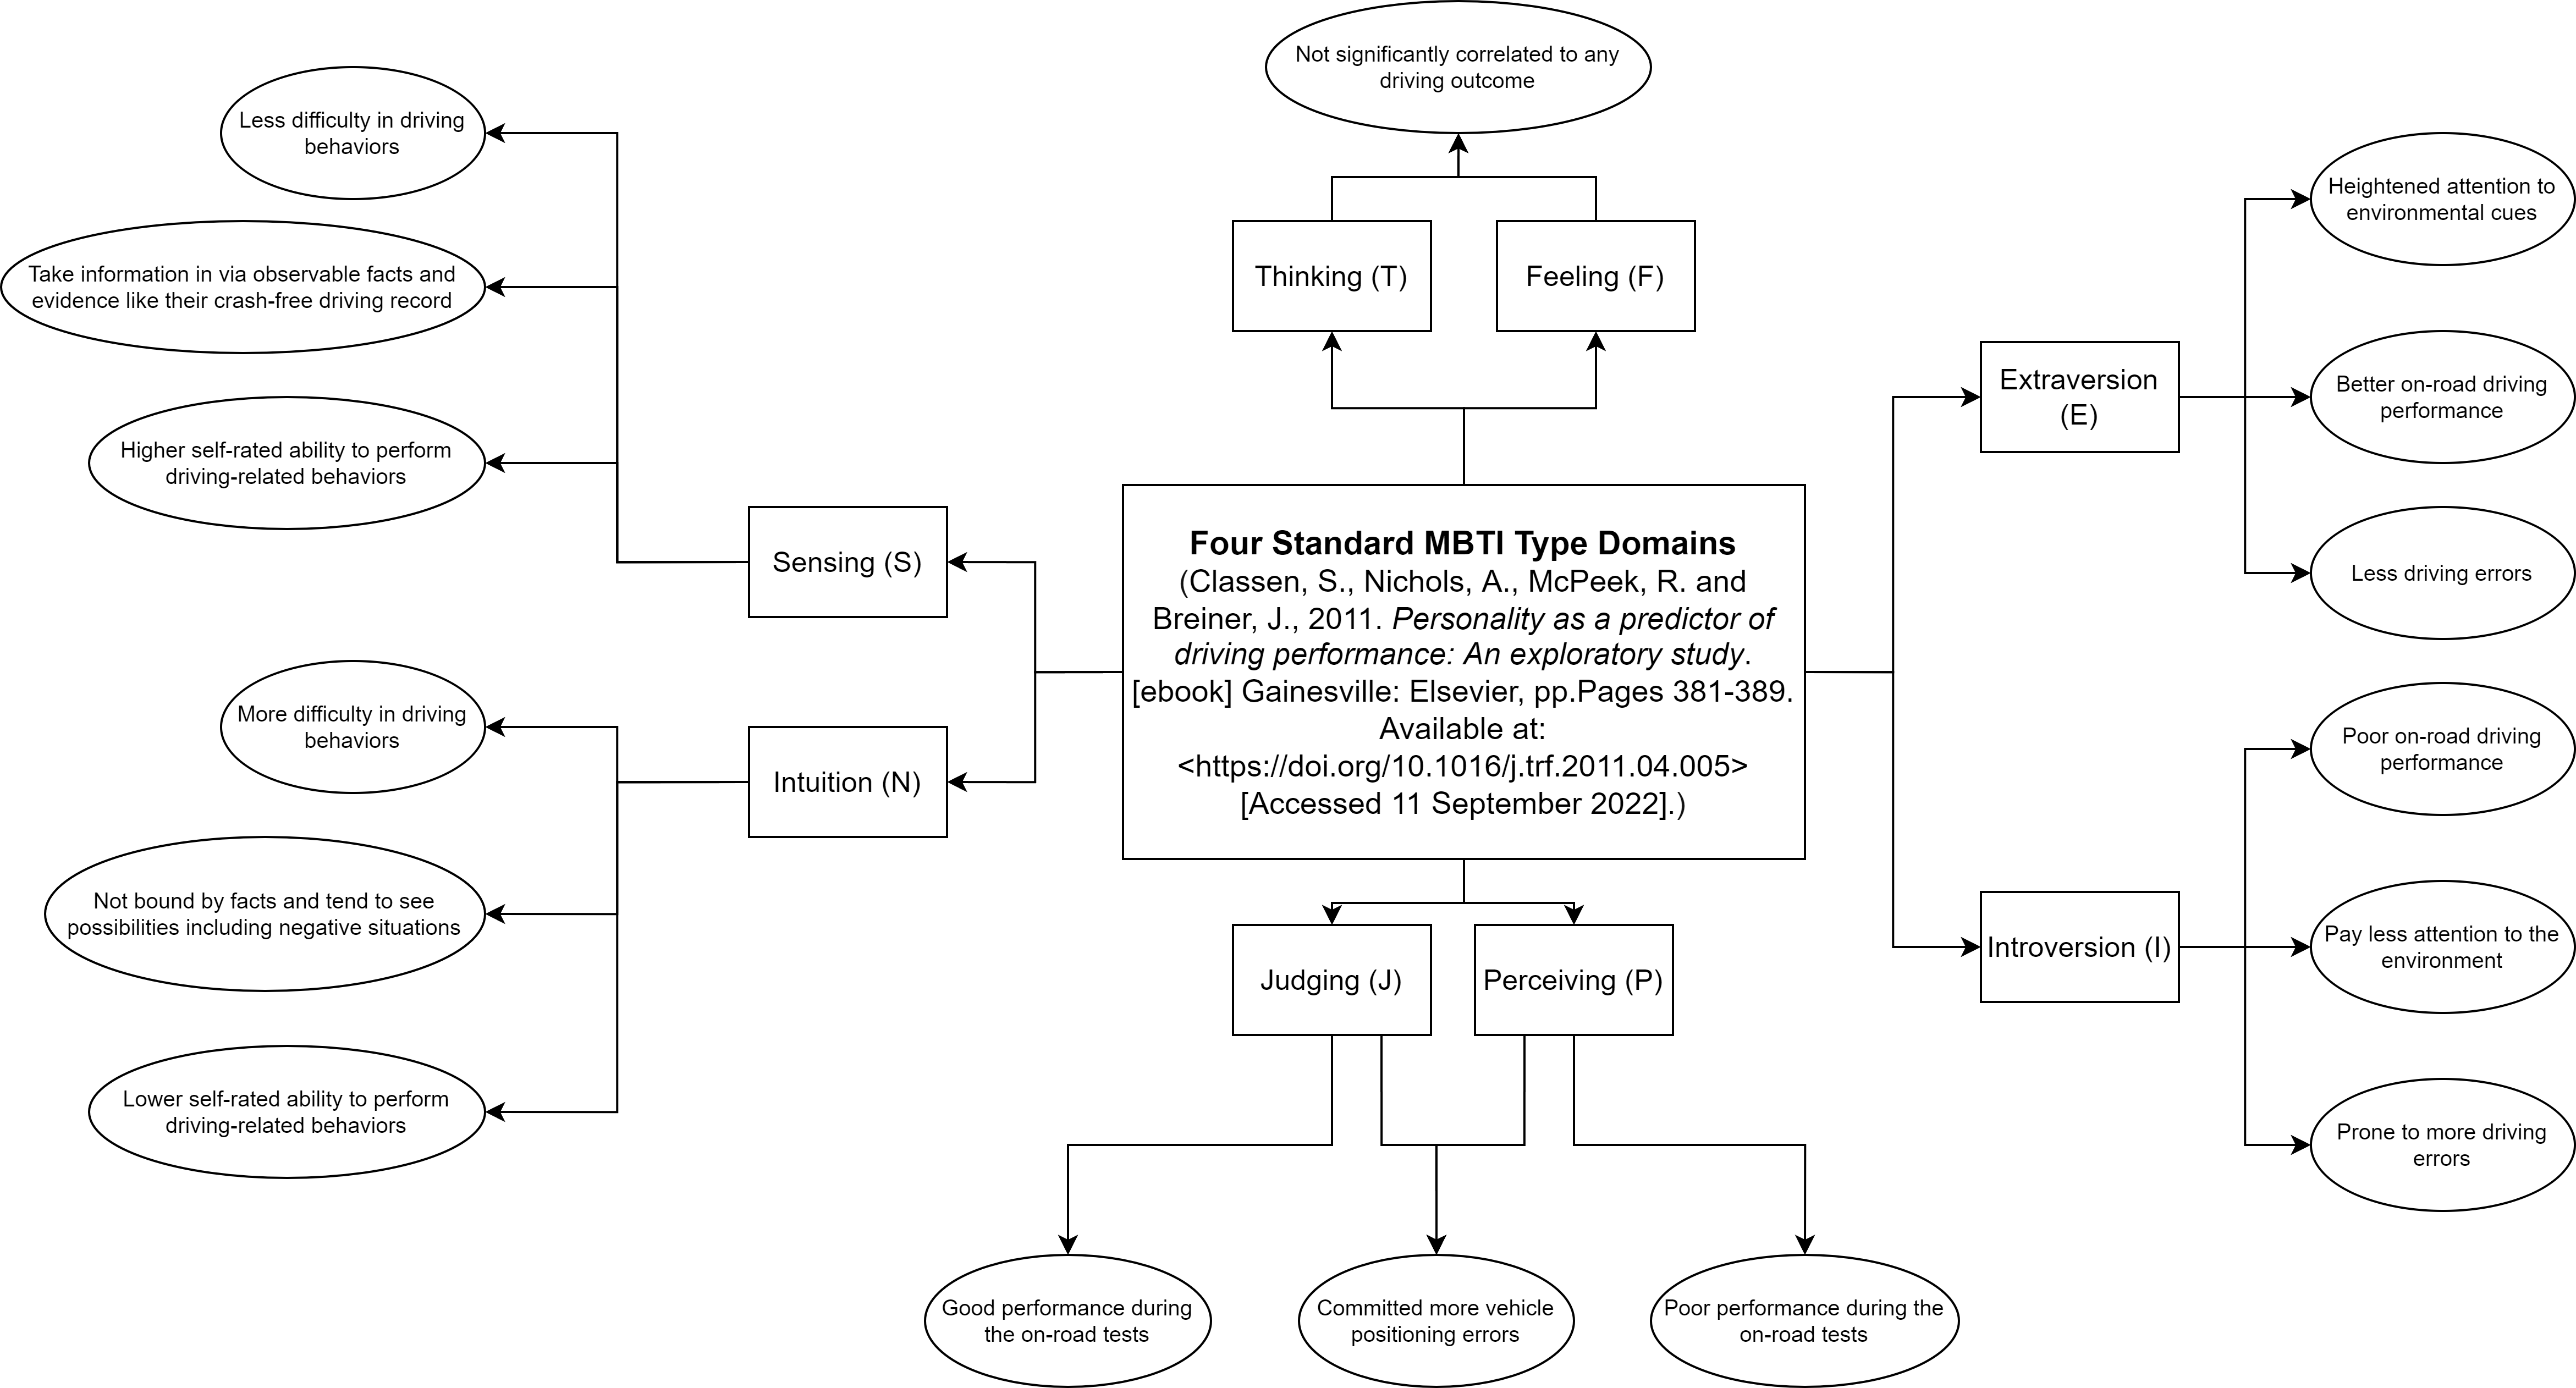

In [13]:
## The four standard MBTI Type Domains to refer on the driving behaviours
from IPython.display import Image
Image(filename='MBTI_mapping.png') 